In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('C:/Users/10430/Desktop/insurance_claims.csv')

In [3]:
pd.set_option('display.max_columns', None)
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,2015-02-22,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,2015-01-24,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,2015-01-23,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,2015-02-26,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
# 
data_types = df.dtypes

# 
unique_counts = df.nunique()

# 
min_values = df.min()

# 
max_values = df.max()

# 
mean_values = df.mean(numeric_only=True)

# 
median_values = df.median(numeric_only=True)

# 
summary_df = pd.DataFrame({
    'DataType': data_types,
    'UniqueValues': unique_counts,
    'Min': min_values,
    'Max': max_values,
    'Mean': mean_values,
    'Median': median_values
})

# 
summary_df

,DataType,UniqueValues,Min,Max,Mean,Median
_c39,float64,0,NaN,NaN,NaN,NaN
age,int64,46,19,64,3.894800e+01,38.0
authorities_contacted,object,5,Ambulance,Police,NaN,NaN
auto_make,object,14,Accura,Volkswagen,NaN,NaN
auto_model,object,39,3 Series,X6,NaN,NaN
auto_year,int64,21,1995,2015,2.005103e+03,2005.0
bodily_injuries,int64,3,0,2,9.920000e-01,1.0
capital-gains,int64,338,0,100500,2.512610e+04,0.0
capital-loss,int64,354,-111100,0,-2.679370e+04,-23250.0
collision_type,object,4,?,Side Collision,NaN,NaN


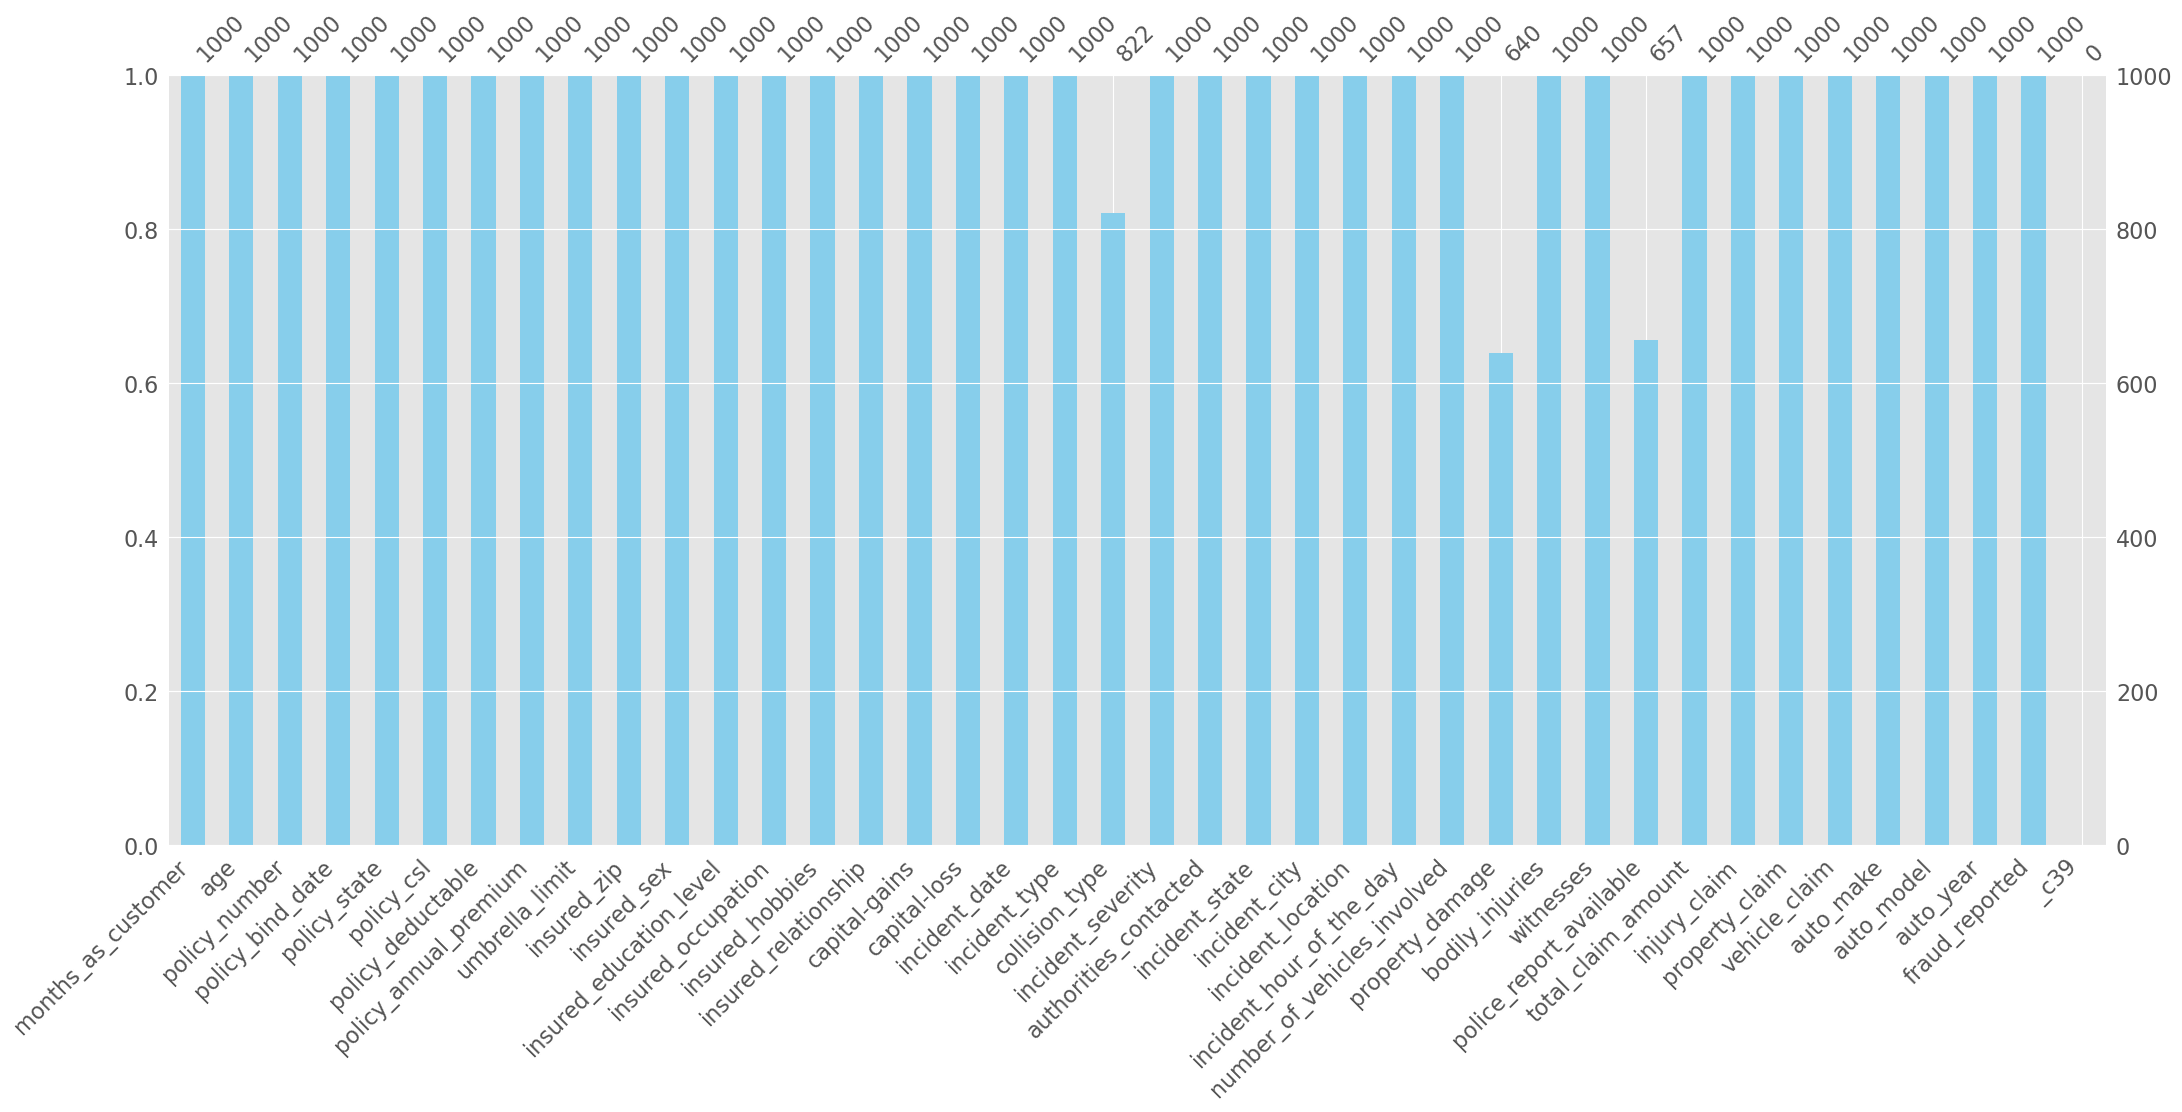

In [6]:
# https://www.kaggle.com/code/residentmario/using-missingno-to-diagnose-data-sparsity
df.replace('?', np.nan, inplace = True)
import missingno as msno
msno.bar(df,color='skyblue')
plt.show()

In [12]:
# Mode Imputation: Filling missing values with the most frequent value (mode) for each specified column.

# Fill missing values in 'collision_type' with the most frequent value (mode) of the column.
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])

# Fill missing values in 'property_damage' with the most frequent value (mode) of the column.
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])

# Fill missing values in 'police_report_available' with the most frequent value (mode) of the column.
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])


In [13]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,2015-02-22,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,NO,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,2015-01-24,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,2015-01-23,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,NO,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,2015-02-26,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,NO,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [14]:
summary_df

,DataType,UniqueValues,Min,Max,Mean,Median
_c39,float64,0,NaN,NaN,NaN,NaN
age,int64,46,19,64,3.894800e+01,38.0
authorities_contacted,object,5,Ambulance,Police,NaN,NaN
auto_make,object,14,Accura,Volkswagen,NaN,NaN
auto_model,object,39,3 Series,X6,NaN,NaN
auto_year,int64,21,1995,2015,2.005103e+03,2005.0
bodily_injuries,int64,3,0,2,9.920000e-01,1.0
capital-gains,int64,338,0,100500,2.512610e+04,0.0
capital-loss,int64,354,-111100,0,-2.679370e+04,-23250.0
collision_type,object,4,?,Side Collision,NaN,NaN


In [63]:
# Imputation: Replacing negative values in the 'umbrella_limit' column with 0.
df.loc[df['umbrella_limit'] < 0, 'umbrella_limit'] = 0

In [15]:
#  OpenAI. (2024). ChatGPT [Large language model]. https://chatgpt.com
# Drop irrelevant columns
Col_drop = ['policy_number', 'policy_bind_date', 'insured_zip', 'incident_location', 'incident_date',
            'insured_hobbies', 'auto_model', 'auto_year', '_c39']

df.drop(Col_drop, inplace=True, axis=1)


In [16]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,Y
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,Y
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,N
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,unmarried,0,0,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,20,1,YES,0,1,NO,87200,17440,8720,61040,Honda,N
996,285,41,IL,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,wife,70900,0,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,23,1,YES,2,3,NO,108480,18080,18080,72320,Volkswagen,N
997,130,34,OH,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,other-relative,35100,0,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,4,3,NO,2,3,YES,67500,7500,7500,52500,Suburu,N
998,458,62,IL,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,wife,0,0,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,2,1,NO,0,1,YES,46980,5220,5220,36540,Audi,N


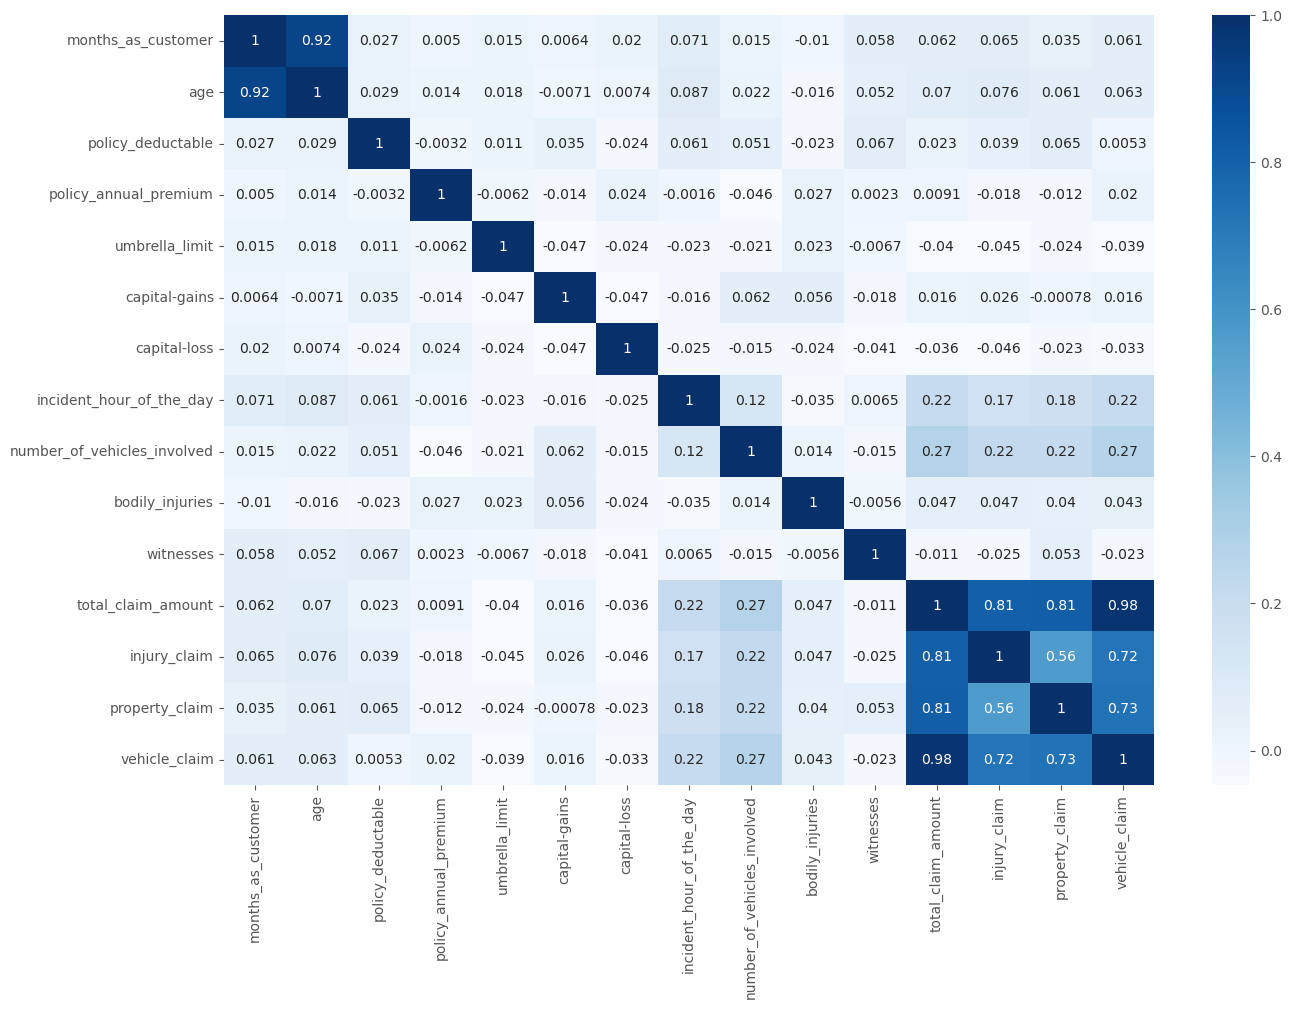

In [17]:
# Checking for multicollinearity: displaying correlation matrix using a heatmap.
# OpenAI. (2024). ChatGPT [Large language model]. https://chatgpt.com
plt.figure(figsize=(15, 10))

corr = df.corr()  # Calculate the correlation matrix
sns.heatmap(data=corr, annot=True, fmt='.2g', cmap='Blues')  # Plot heatmap without mask
plt.show()


In [18]:
df.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)

In [19]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

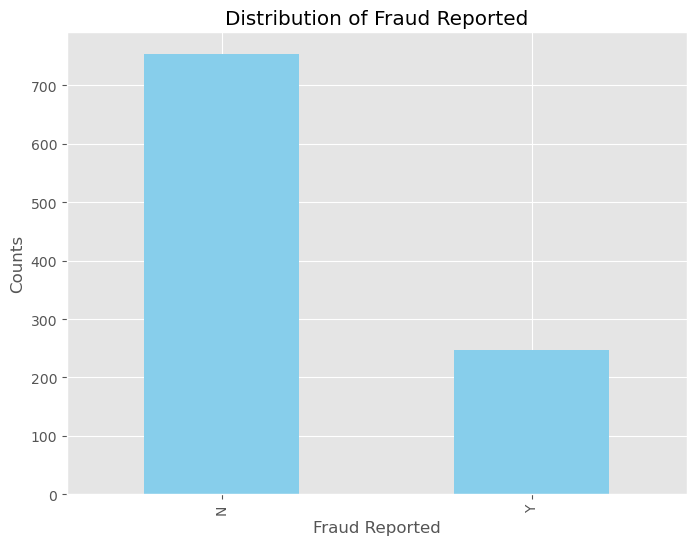

In [20]:
# Extra plot for 'fraud_reported' to highlight
fig_fraud, ax_fraud = plt.subplots(figsize=(8, 6))
df['fraud_reported'].value_counts().plot(kind='bar', ax=ax_fraud, color='skyblue')
ax_fraud.set_title('Distribution of Fraud Reported')
ax_fraud.set_xlabel('Fraud Reported')
ax_fraud.set_ylabel('Counts')

plt.show()

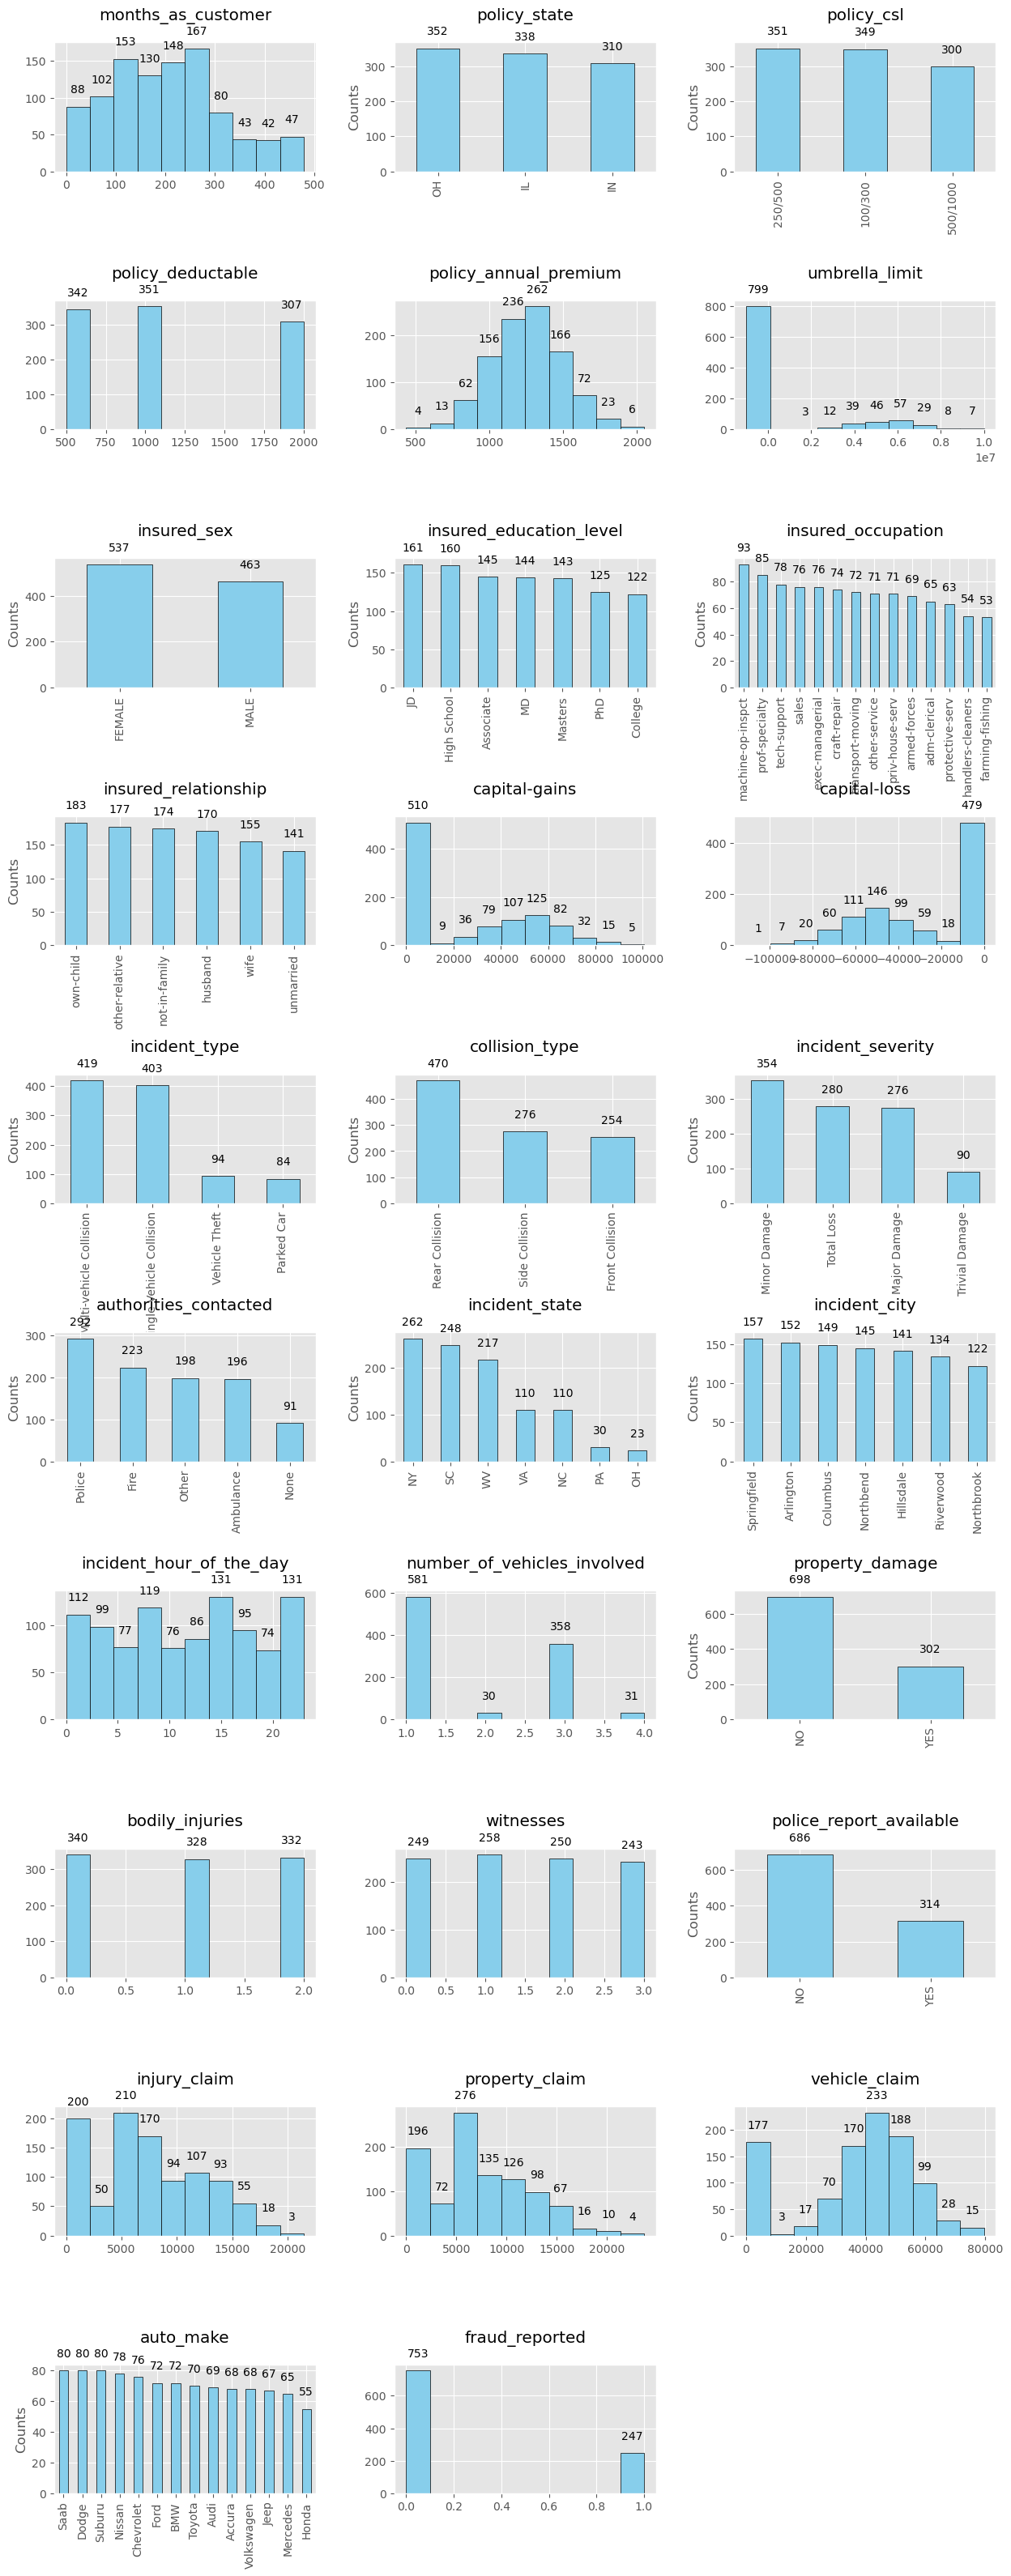

In [23]:
# OpenAI. (2024). ChatGPT [Large language model]. https://chatgpt.com

fig, axes = plt.subplots(nrows=15, ncols=3, figsize=(15, 60))  
fig.subplots_adjust(hspace=1, wspace=0.3)  
axes = axes.ravel()  # Flatten the axes array

for i, col in enumerate(df.columns):
    if df[col].dtype == 'object':
        # If the data type is object, plot a bar plot with black edges and annotations (categorical data)
        counts = df[col].value_counts()
        bars = counts.plot(kind='bar', ax=axes[i], color='skyblue', edgecolor='black')
        axes[i].set_title(col, pad=20)  # Increased padding for the title
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Counts')
        # Adding text annotations with vertical offset to prevent overlap
        for p in bars.patches:
            axes[i].annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 10), textcoords='offset points')
    else:
        # Plot a histogram with black edges and annotations (numerical data)
        n, bins, patches = axes[i].hist(df[col], color='skyblue', edgecolor='black')
        axes[i].set_title(col, pad=20)  # Increased padding for the title
        # Adding text annotations with vertical offset to prevent overlap
        for bin, patch in zip(bins, patches):
            x = patch.get_x() + patch.get_width() / 2
            y = patch.get_height()
            if y > 0:  # Only annotate non-zero bins
                axes[i].annotate(str(int(y)), (x, y), textcoords="offset points", xytext=(0,10), ha='center', va='bottom')

# Hide unused subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.show()


In [22]:
# Mapping 'Y' to 1 and 'N' to 0 in the 'fraud_reported' column for binary representation of fraud reporting
df['fraud_reported'] = df['fraud_reported'].map({'Y': 1, 'N': 0})

In [27]:
# Splitting the dataset into features (X) and target (y).
X = df.drop('fraud_reported', axis=1)
y = df['fraud_reported']

In [29]:
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int64

In [31]:
# OpenAI. (2024). ChatGPT [Large language model]. https://chatgpt.com
# Selecting categorical columns: extracting columns with data type 'object' 
cat_col = X.select_dtypes(include=['object'])

# One-hot encoding categorical columns: converting categorical variables into dummy/indicator variables.
# 'drop_first=True' removes the first level of each categorical variable to avoid multicollinearity.
cat_col = pd.get_dummies(cat_col, drop_first=True)


In [32]:
cat_col

,policy_state_IN,policy_state_OH,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,property_damage_YES,police_report_available_YES,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen
0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
997,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
998,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
summary_df

,DataType,UniqueValues,Min,Max,Mean,Median
_c39,float64,0,NaN,NaN,NaN,NaN
age,int64,46,19,64,3.894800e+01,38.0
authorities_contacted,object,5,Ambulance,Police,NaN,NaN
auto_make,object,14,Accura,Volkswagen,NaN,NaN
auto_model,object,39,3 Series,X6,NaN,NaN
auto_year,int64,21,1995,2015,2.005103e+03,2005.0
bodily_injuries,int64,3,0,2,9.920000e-01,1.0
capital-gains,int64,338,0,100500,2.512610e+04,0.0
capital-loss,int64,354,-111100,0,-2.679370e+04,-23250.0
collision_type,object,4,?,Side Collision,NaN,NaN


In [34]:
# Selecting numerical columns: extracting columns with data types 'int64' and 'float64' (i.e., numerical variables) from X.
num_col = X.select_dtypes(include=['int64', 'float64'])

In [37]:
# Combining numerical and encoded categorical columns: concatenating the numerical columns (num_col)
# and the one-hot encoded categorical columns (cat_col) along the column axis to form the final feature set X.
X = pd.concat([num_col, cat_col], axis=1)

In [38]:
X

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,policy_state_IN,policy_state_OH,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,property_damage_YES,police_report_available_YES,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen
0,328,1000,1406.91,0,53300,0,5,1,1,2,6510,13020,52080,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,228,2000,1197.22,5000000,0,0,8,1,0,0,780,780,3510,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,134,2000,1413.14,5000000,35100,0,7,3,2,3,7700,3850,23100,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,256,2000,1415.74,6000000,48900,-62400,5,1,1,2,6340,6340,50720,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,228,1000,1583.91,6000000,66000,-46000,20,1,0,1,1300,650,4550,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,1000,1310.80,0,0,0,20,1,0,1,17440,8720,61040,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
996,285,1000,1436.79,0,70900,0,23,1,2,3,18080,18080,72320,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
997,130,500,1383.49,3000000,35100,0,4,3,2,3,7500,7500,52500,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
998,458,2000,1356.92,5000000,0,0,2,1,0,1,5220,5220,36540,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0

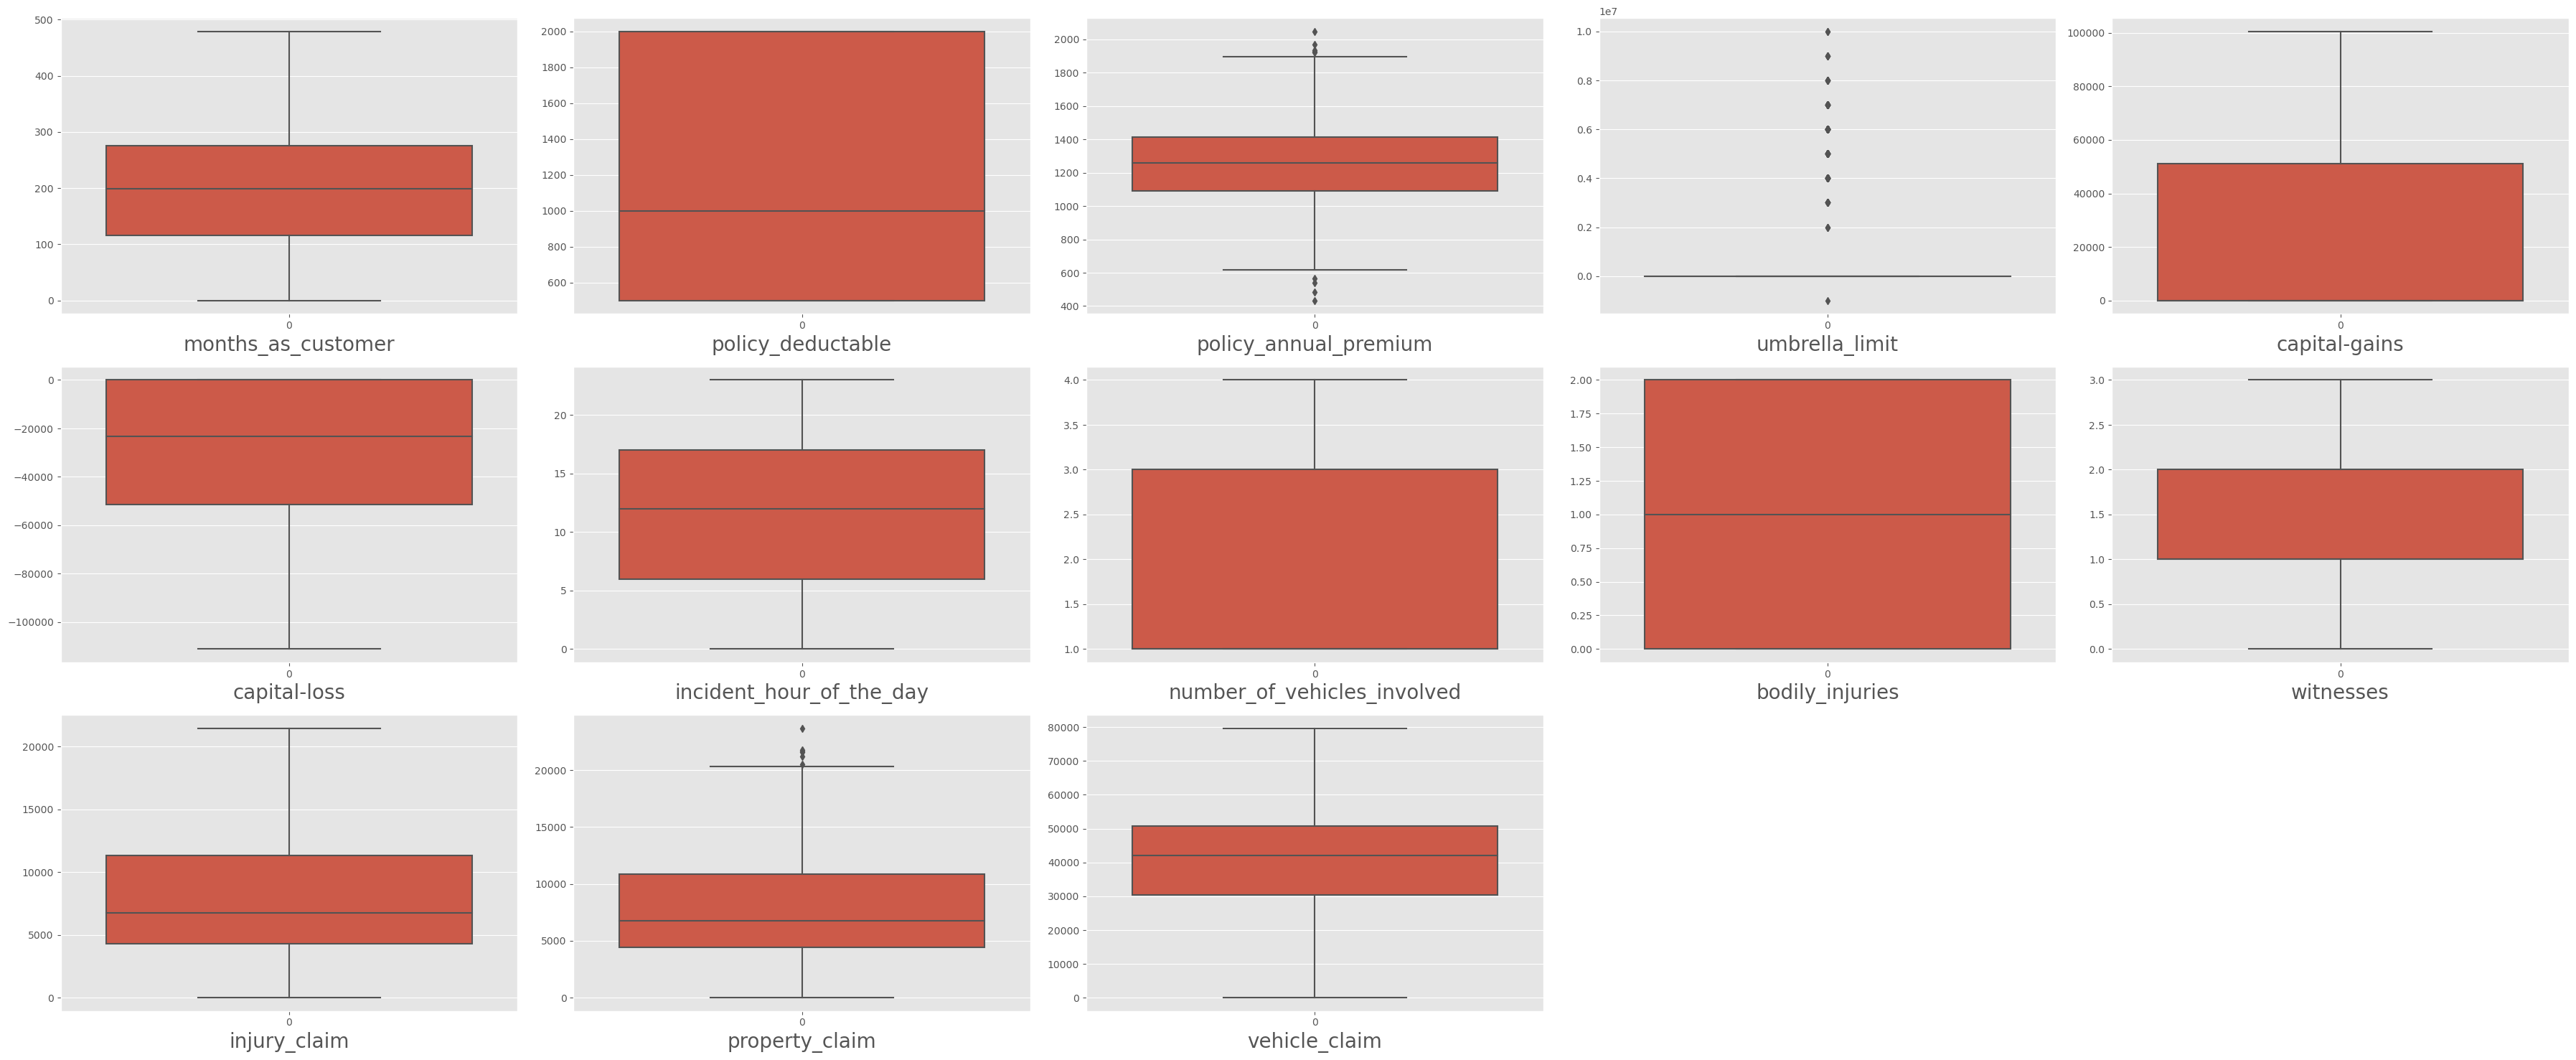

In [41]:
# Creating boxplots for each feature in X to visualize potential outliers.
# A grid of subplots is created with a maximum of 13 plots displayed in a 5x5 layout.
plt.figure(figsize=(36, 24))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 13:  # Limit the number of subplots to 13
        ax = plt.subplot(5, 5, plotnumber)  # Create a subplot
        sns.boxplot(X[col])  # Generate a boxplot for each column
        plt.xlabel(col, fontsize=20)  # Set x-axis label with the column name
    
    plotnumber += 1

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plots


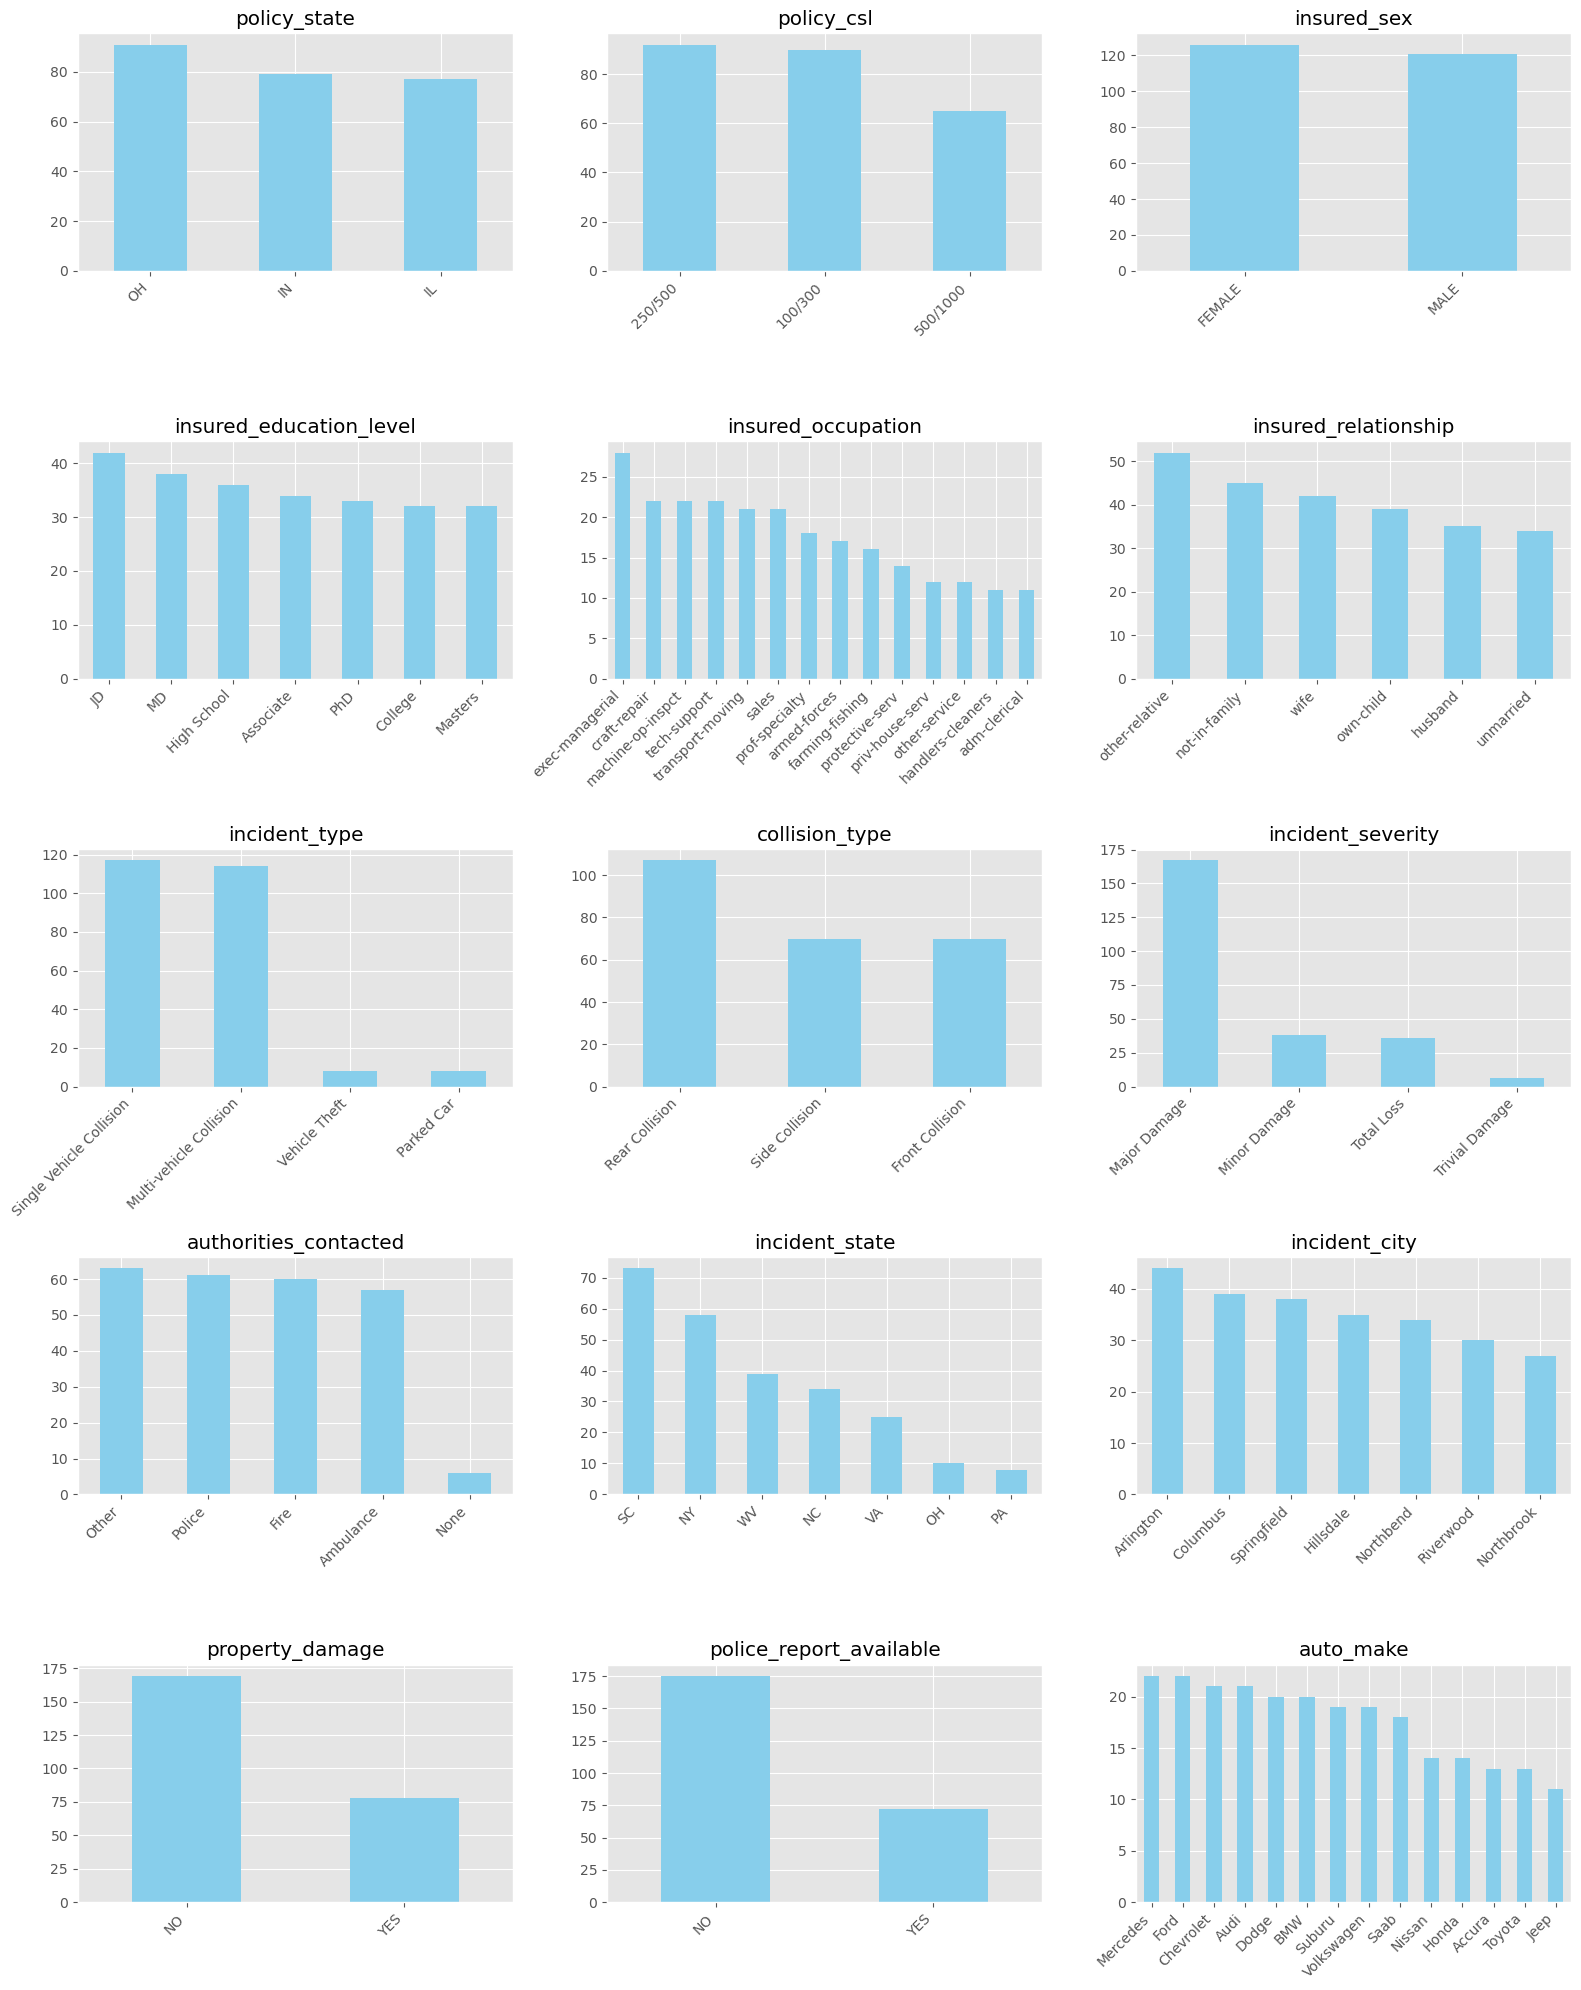

In [42]:
# Let's identify the categorical columns first
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Filter the dataset for fraud reported as 'Y'
fraud_data = df[df['fraud_reported'] == 1]

# Adjusting the plot layout to display multiple plots per row for better visualization

# Determine a suitable number of rows and columns
n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols  # Ensure we have enough rows

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, n_rows * 4))

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    fraud_data[col].value_counts().plot(kind='bar', ax=axes[i], title=col, color='skyblue')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha="right")

# Turn off unused axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

fig.tight_layout()
plt.show()


In [46]:
# Splitting data into training set and test set.
# Using stratified sampling to maintain the same proportion of target class labels in both training and test sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [47]:
# Standardising numerical features in the training set.
# Fitting the scaler on the training set and transforming the numerical columns accordingly.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[num_col.columns] = scaler.fit_transform(X_train[num_col.columns])


In [48]:
# SMOTE generates synthetic samples for the minority class in the training data to balance the classes.
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [43]:
#1KNN

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Define the model
knn = KNeighborsClassifier()

# Define the parameter grid
param_grid = {
    'n_neighbors': range(1, 51, 5),  # Testing from 1 to 50 neighbors, in steps of 5
    'weights': ['uniform', 'distance'],  # Weighting criteria
    'metric': ['euclidean', 'manhattan']  # Distance metrics
}

# Setup the grid search
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Retrieve the best estimator from the grid search
best_knn = grid_search.best_estimator_

# Predictions
y_train_pred = best_knn.predict(X_train)
y_test_pred = best_knn.predict(X_test)

# Accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print results
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print(f"Training accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best parameters: {'metric': 'manhattan', 'n_neighbors': 21, 'weights': 'uniform'}
Best cross-validation score: 0.76
Training accuracy: 0.755
Test accuracy: 0.735
[[144   7]
 [ 46   3]]
              precision    recall  f1-score   support

           0       0.76      0.95      0.84       151
           1       0.30      0.06      0.10        49

    accuracy                           0.73       200
   macro avg       0.53      0.51      0.47       200
weighted avg       0.65      0.73      0.66       200



In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Define the model
knn = KNeighborsClassifier()

# Define the parameter grid
param_grid = {
    'n_neighbors': range(1, 51, 5),  # Testing from 1 to 50 neighbors, in steps of 5
    'weights': ['uniform', 'distance'],  # Weighting criteria
    'metric': ['euclidean', 'manhattan']  # Distance metrics
}

# Setup the grid search
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_smote, y_train_smote)

# Retrieve the best estimator from the grid search
best_knn = grid_search.best_estimator_

# Predictions
y_train_pred = best_knn.predict(X_train_smote)
y_test_pred = best_knn.predict(X_test)

# Accuracies
train_accuracy = accuracy_score(y_train_smote, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print results
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print(f"Training accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best parameters: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
Best cross-validation score: 0.64
Training accuracy: 1.0
Test accuracy: 0.45
[[ 51 100]
 [ 10  39]]
              precision    recall  f1-score   support

           0       0.84      0.34      0.48       151
           1       0.28      0.80      0.41        49

    accuracy                           0.45       200
   macro avg       0.56      0.57      0.45       200
weighted avg       0.70      0.45      0.46       200



In [ ]:
#2RF

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the RandomForestClassifier
rand_clf = RandomForestClassifier()

# Define grid of parameters to search
grid_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3,5,7,9],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': range(2, 10,2),
    'min_samples_split': range(2, 10,2),
    'n_estimators': [20,40,60]
}

# Grid Search to find the best parameters
grid_search = GridSearchCV(rand_clf, grid_params, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Using the best estimator
best_rand_clf = grid_search.best_estimator_
y_pred = best_rand_clf.predict(X_test)

# Accuracy scores
rand_clf_train_acc = accuracy_score(y_train, best_rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

# Output results
print(f"Training accuracy of Random Forest is: {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is: {rand_clf_test_acc}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 768 candidates, totalling 3840 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 20}
Best cross-validation score: 0.77
Training accuracy of Random Forest is: 0.83
Test accuracy of Random Forest is: 0.755
[[136  15]
 [ 34  15]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       151
           1       0.50      0.31      0.38        49

    accuracy                           0.76       200
   macro avg       0.65      0.60      0.61       200
weighted avg       0.73      0.76      0.73       200



In [53]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the RandomForestClassifier
rand_clf = RandomForestClassifier()

# Define grid of parameters to search
grid_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3,5,7,9],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': range(2, 10,2),
    'min_samples_split': range(2, 10,2),
    'n_estimators': [20,40,60]
}

# Grid Search to find the best parameters
grid_search = GridSearchCV(rand_clf, grid_params, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Using the best estimator
best_rand_clf = grid_search.best_estimator_
y_pred = best_rand_clf.predict(X_test)

# Accuracy scores
rand_clf_train_acc = accuracy_score(y_train_smote, best_rand_clf.predict(X_train_smote))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

# Output results
print(f"Training accuracy of Random Forest is: {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is: {rand_clf_test_acc}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 768 candidates, totalling 3840 fits
Best parameters: {'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 60}
Best cross-validation score: 0.86
Training accuracy of Random Forest is: 0.9601328903654485
Test accuracy of Random Forest is: 0.815
[[131  20]
 [ 17  32]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       151
           1       0.62      0.65      0.63        49

    accuracy                           0.81       200
   macro avg       0.75      0.76      0.75       200
weighted avg       0.82      0.81      0.82       200



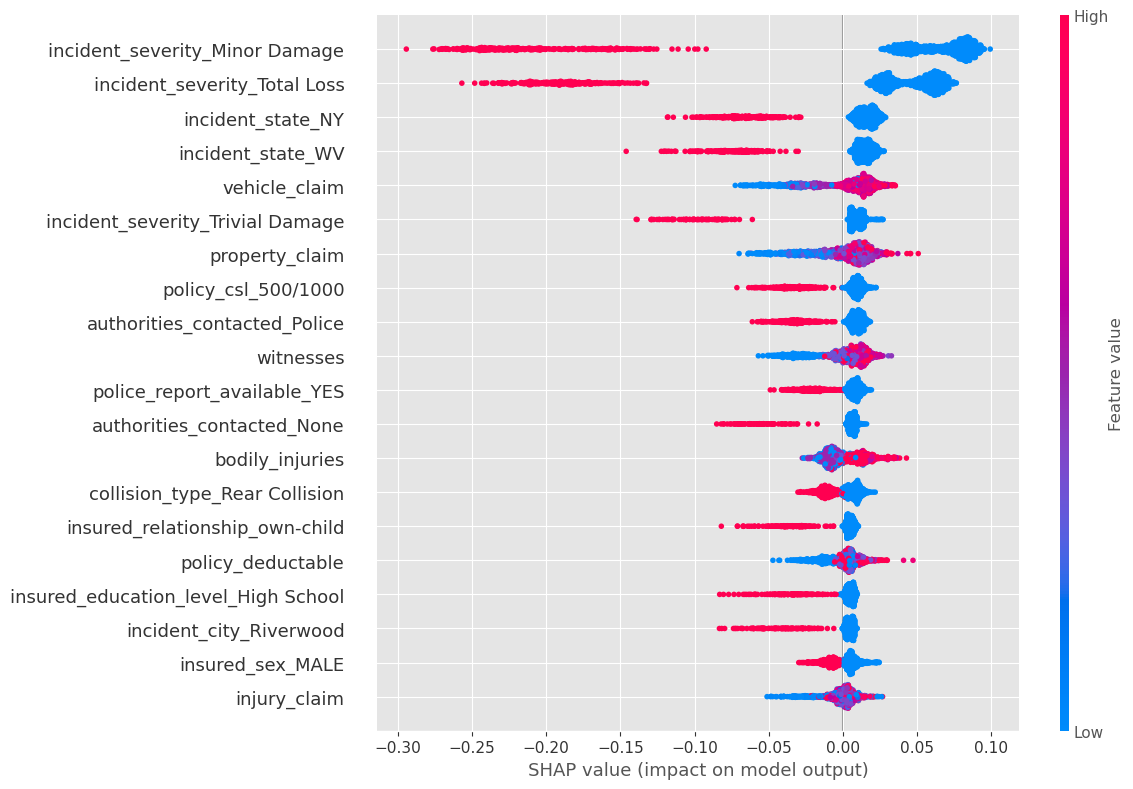

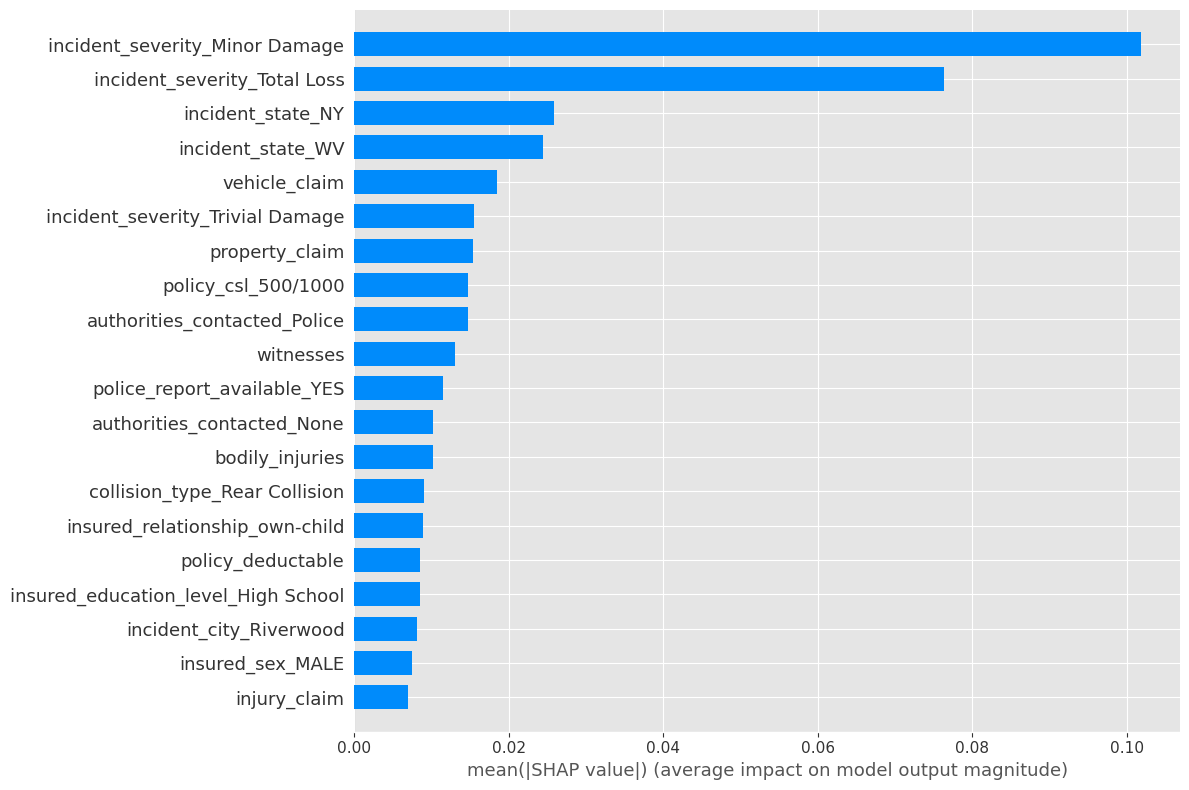

In [54]:
import shap

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(best_rand_clf)

# Calculate SHAP values
shap_values = explainer.shap_values(X_train_smote)

# Plot SHAP Summary Plot
shap.summary_plot(shap_values[:,:,1], X_train_smote, plot_size=(12, 8))

# Plot SHAP Feature Importance Bar Chart
shap.summary_plot(shap_values[:,:,1], X_train_smote, plot_type="bar", plot_size=(12, 8))



In [ ]:
#3 ADA

In [56]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

In [63]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoost with dtc as the base estimator
ada = AdaBoostClassifier(base_estimator=dtc, random_state=42)

# Define grid of parameters for AdaBoost
parameters = {
    'n_estimators': [50, 90, 120, 180],
    'learning_rate': [0.01, 0.1, 1, 10],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Grid Search to find the best parameters
grid_search = GridSearchCV(ada, parameters, n_jobs=-1, cv=5, verbose=1)  
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Using the best estimator
best_ada = grid_search.best_estimator_
y_pred = best_ada.predict(X_test)

# Accuracy scores
ada_train_acc = accuracy_score(y_train, best_ada.predict(X_train))
ada_test_acc = accuracy_score(y_test, y_pred)

# Output results
print(f"Training accuracy of Ada Boost is: {ada_train_acc}")
print(f"Test accuracy of Ada Boost is: {ada_test_acc}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 50}
Best cross-validation score: 0.73
Training accuracy of Ada Boost is: 1.0
Test accuracy of Ada Boost is: 0.54
[[101  50]
 [ 42   7]]
              precision    recall  f1-score   support

           0       0.71      0.67      0.69       151
           1       0.12      0.14      0.13        49

    accuracy                           0.54       200
   macro avg       0.41      0.41      0.41       200
weighted avg       0.56      0.54      0.55       200



In [64]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoost with dtc as the base estimator
ada = AdaBoostClassifier(base_estimator=dtc, random_state=42)

# Define grid of parameters for AdaBoost
parameters = {
    'n_estimators': [50, 90, 120, 180],
    'learning_rate': [0.01, 0.1, 1, 10],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Grid Search to find the best parameters
grid_search = GridSearchCV(ada, parameters, n_jobs=-1, cv=5, verbose=1)  
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Using the best estimator
best_ada = grid_search.best_estimator_
y_pred = best_ada.predict(X_test)

# Accuracy scores
ada_train_acc = accuracy_score(y_train_smote, best_ada.predict(X_train_smote))
ada_test_acc = accuracy_score(y_test, y_pred)

# Output results
print(f"Training accuracy of Ada Boost is: {ada_train_acc}")
print(f"Test accuracy of Ada Boost is: {ada_test_acc}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 50}
Best cross-validation score: 0.79
Training accuracy of Ada Boost is: 1.0
Test accuracy of Ada Boost is: 0.68
[[122  29]
 [ 35  14]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       151
           1       0.33      0.29      0.30        49

    accuracy                           0.68       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.67      0.68      0.67       200



In [ ]:
#4 XGB

In [87]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the XGBClassifier
xgb = XGBClassifier(random_state=1)

# Define grid of parameters to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': range(3, 8),
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}

# Grid Search to find the best parameters
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, verbose=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Using the best estimator
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

# Accuracy scores
xgb_train_acc = accuracy_score(y_train, best_xgb.predict(X_train))
xgb_test_acc = accuracy_score(y_test, y_pred)

# Output results
print(f"Training accuracy of XgBoost is: {xgb_train_acc}")
print(f"Test accuracy of XgBoost is: {xgb_test_acc}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 150, 'subsample': 1.0}
Best cross-validation score: 0.79
Training accuracy of XgBoost is: 0.925
Test accuracy of XgBoost is: 0.755
[[151   0]
 [ 49   0]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       151
           1       0.00      0.00      0.00        49

    accuracy                           0.76       200
   macro avg       0.38      0.50      0.43       200
weighted avg       0.57      0.76      0.65       200



In [94]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the XGBClassifier
xgb = XGBClassifier(random_state=1)

# Define grid of parameters to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': range(3, 8),
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}

# Grid Search to find the best parameters
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, verbose=3, n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Using the best estimator
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

# Accuracy scores
xgb_train_acc = accuracy_score(y_train_smote, best_xgb.predict(X_train_smote))
xgb_test_acc = accuracy_score(y_test, y_pred)

# Output results
print(f"Training accuracy of XgBoost is: {xgb_train_acc}")
print(f"Test accuracy of XgBoost is: {xgb_test_acc}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.9}
Best cross-validation score: 0.87
Training accuracy of XgBoost is: 1.0
Test accuracy of XgBoost is: 0.785
[[127  24]
 [ 19  30]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       151
           1       0.56      0.61      0.58        49

    accuracy                           0.79       200
   macro avg       0.71      0.73      0.72       200
weighted avg       0.79      0.79      0.79       200



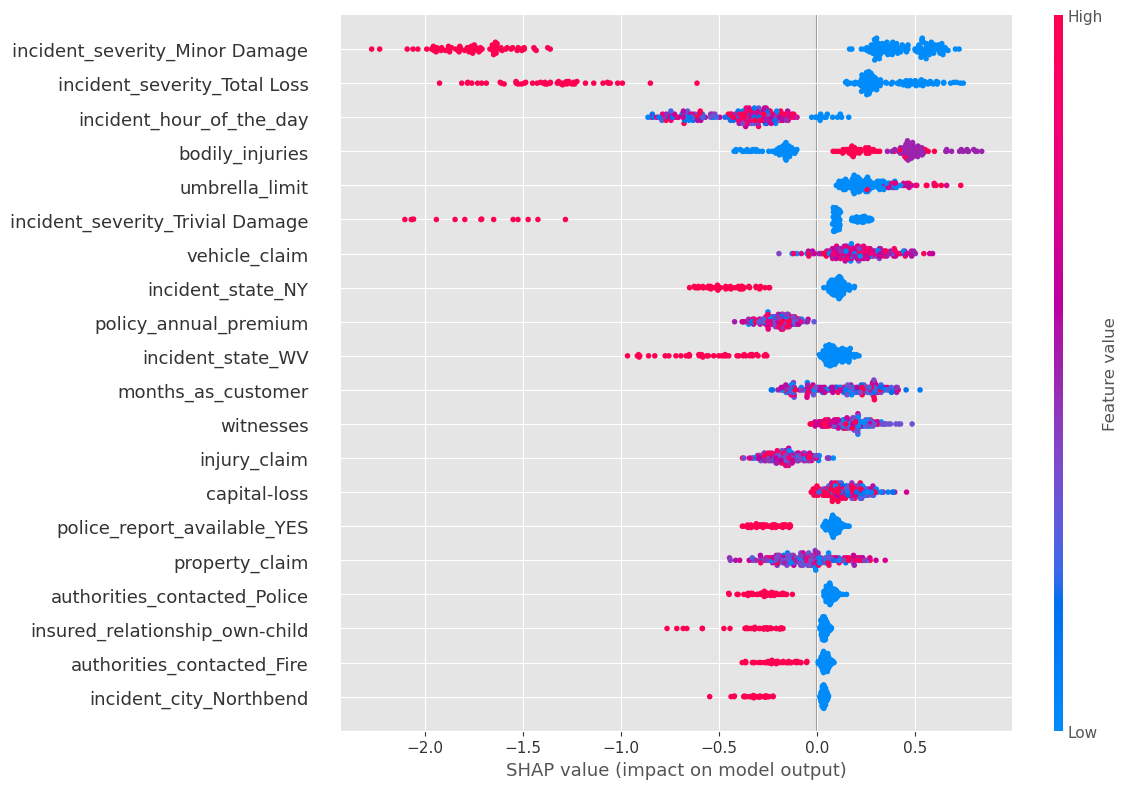

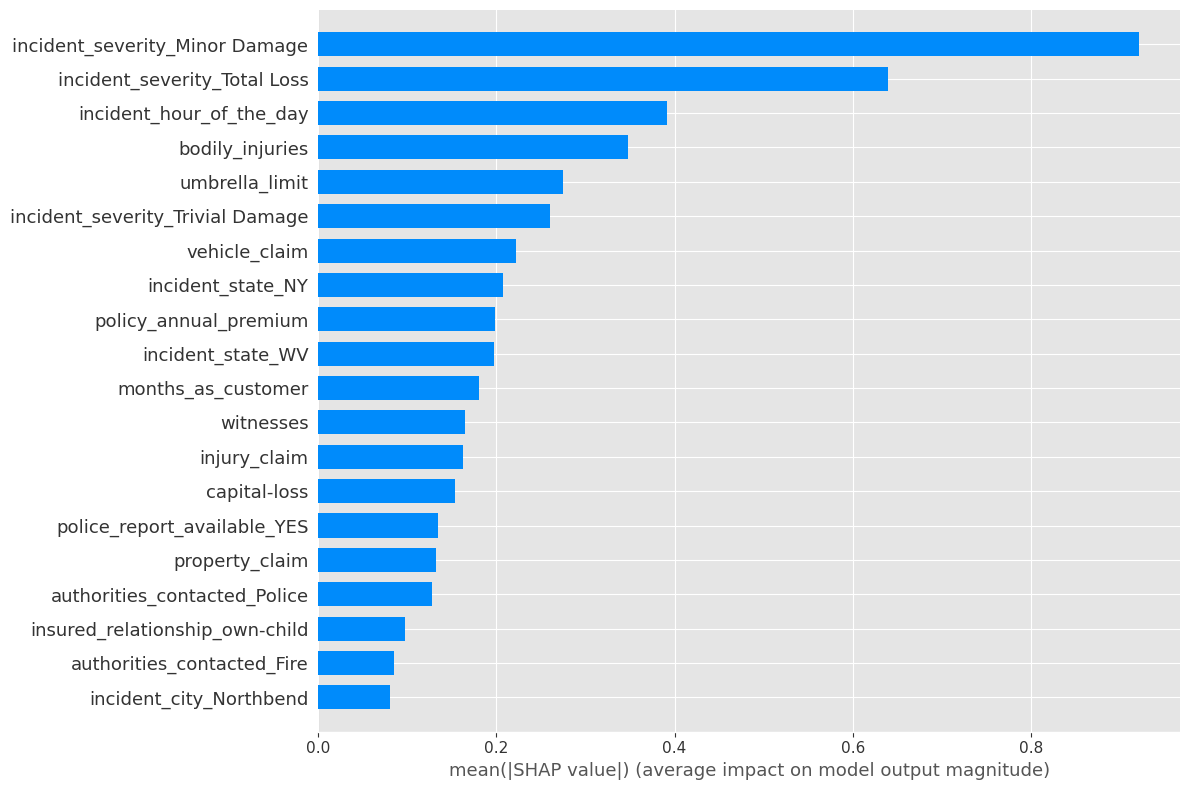

In [95]:
import shap

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(best_xgb)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Detailed summary plot (shows the distribution of SHAP values for each feature)
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns,plot_size=(12, 8))

# Summary plot (shows feature importance and the effect of each feature)
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X_test.columns,plot_size=(12, 8))






In [ ]:
#5 CATBoost

In [90]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the CatBoostClassifier
cat = CatBoostClassifier(verbose=0)  # Set verbose to 0 to avoid a lot of output during training

# Define grid of parameters to search
parameters = {
    'iterations': [10, 20,30],
    'learning_rate': [0.01, 0.1, 0.3],
    'depth': [4, 6, 8]
}

# Grid Search to find the best parameters
grid_search = GridSearchCV(estimator=cat, param_grid=parameters, cv=5, n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Using the best estimator
best_cat = grid_search.best_estimator_
y_pred = best_cat.predict(X_test)

# Accuracy scores
cat_train_acc = accuracy_score(y_train, best_cat.predict(X_train))
cat_test_acc = accuracy_score(y_test, y_pred)

# Output results
print(f"Training Accuracy of Cat Boost Classifier is: {cat_train_acc}")
print(f"Test Accuracy of Cat Boost Classifier is: {cat_test_acc} \n")
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report :- \n {classification_report(y_test, y_pred)}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'depth': 6, 'iterations': 30, 'learning_rate': 0.3}
Best cross-validation score: 0.78
Training Accuracy of Cat Boost Classifier is: 0.9725
Test Accuracy of Cat Boost Classifier is: 0.665 

Confusion Matrix :- 
[[106  45]
 [ 22  27]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.83      0.70      0.76       151
           1       0.38      0.55      0.45        49

    accuracy                           0.67       200
   macro avg       0.60      0.63      0.60       200
weighted avg       0.72      0.67      0.68       200



In [91]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the CatBoostClassifier
cat = CatBoostClassifier(verbose=0)  # Set verbose to 0 to avoid a lot of output during training

# Define grid of parameters to search
parameters = {
    'iterations': [10, 20,30],
    'learning_rate': [0.01, 0.1, 0.3],
    'depth': [4, 6, 8]
}

# Grid Search to find the best parameters
grid_search = GridSearchCV(estimator=cat, param_grid=parameters, cv=5, n_jobs=-1, verbose=3)
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Using the best estimator
best_cat = grid_search.best_estimator_
y_pred = best_cat.predict(X_test)

# Accuracy scores
cat_train_acc = accuracy_score(y_train_smote, best_cat.predict(X_train_smote))
cat_test_acc = accuracy_score(y_test, y_pred)

# Output results
print(f"Training Accuracy of Cat Boost Classifier is: {cat_train_acc}")
print(f"Test Accuracy of Cat Boost Classifier is: {cat_test_acc} \n")
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report :- \n {classification_report(y_test, y_pred)}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'depth': 4, 'iterations': 30, 'learning_rate': 0.3}
Best cross-validation score: 0.86
Training Accuracy of Cat Boost Classifier is: 0.920265780730897
Test Accuracy of Cat Boost Classifier is: 0.785 

Confusion Matrix :- 
[[127  24]
 [ 19  30]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.87      0.84      0.86       151
           1       0.56      0.61      0.58        49

    accuracy                           0.79       200
   macro avg       0.71      0.73      0.72       200
weighted avg       0.79      0.79      0.79       200



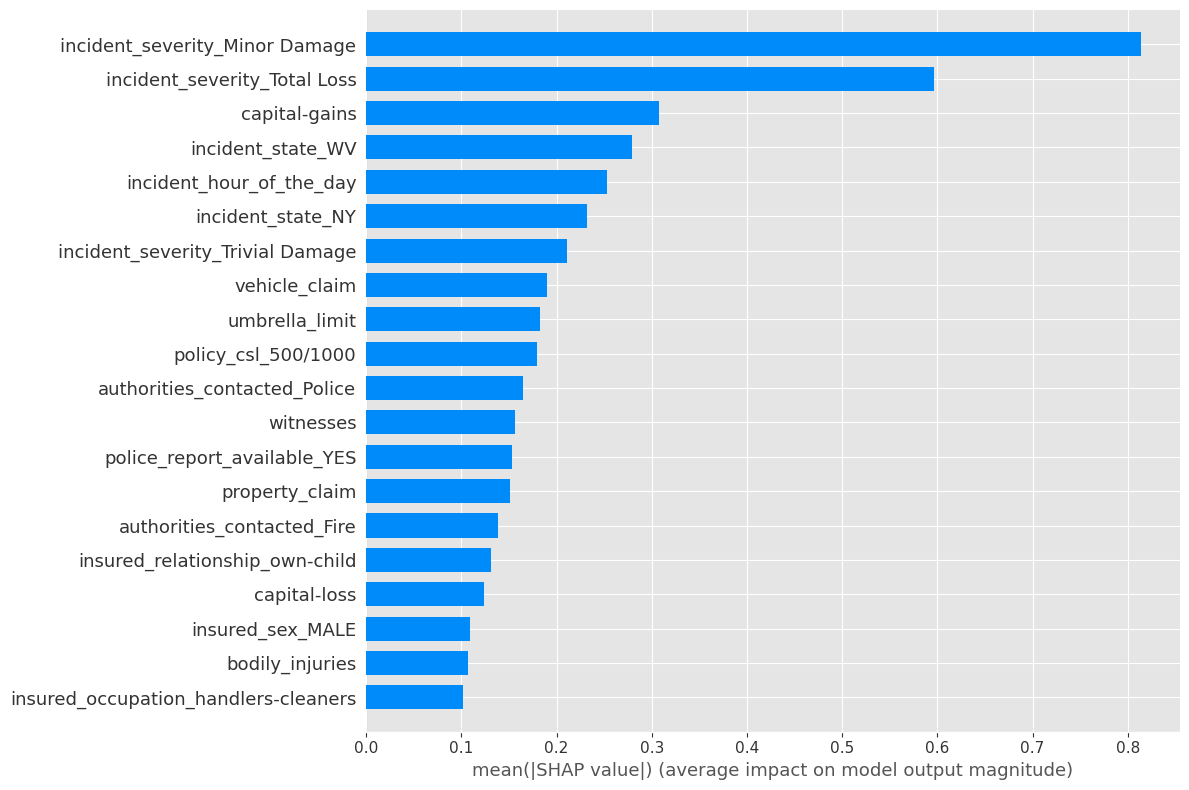

In [92]:
import shap
import matplotlib.pyplot as plt

# Create an Explainer object
explainer = shap.TreeExplainer(best_cat)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar", plot_size=(12, 8))  # Display feature importance using a bar chart



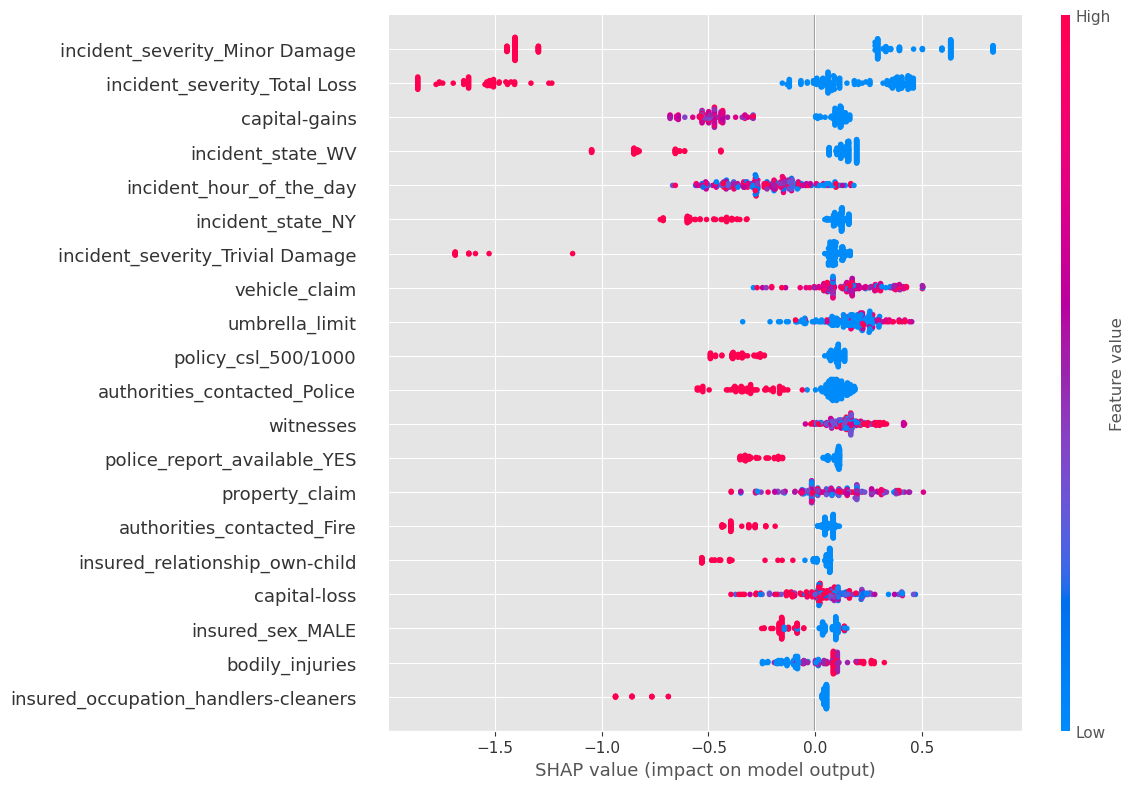

In [93]:
# SHAP summary plot
shap.summary_plot(shap_values, X_test,plot_size=(12, 8))


In [ ]:
#6 ETC

In [73]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the ExtraTreesClassifier
etc = ExtraTreesClassifier()

# Define grid of parameters to search
parameters = {
    'n_estimators': [50, 100, 150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search to find the best parameters
grid_search = GridSearchCV(estimator=etc, param_grid=parameters, cv=5, n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Using the best estimator
best_etc = grid_search.best_estimator_
y_pred = best_etc.predict(X_test)

# Accuracy scores
etc_train_acc = accuracy_score(y_train, best_etc.predict(X_train))
etc_test_acc = accuracy_score(y_test, y_pred)

# Output results
print(f"Training Accuracy of Extra Trees Classifier is: {etc_train_acc}")
print(f"Test Accuracy of Extra Trees Classifier is: {etc_test_acc} \n")
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report :- \n {classification_report(y_test, y_pred)}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation score: 0.78
Training Accuracy of Extra Trees Classifier is: 1.0
Test Accuracy of Extra Trees Classifier is: 0.795 

Confusion Matrix :- 
[[133  18]
 [ 23  26]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.85      0.88      0.87       151
           1       0.59      0.53      0.56        49

    accuracy                           0.80       200
   macro avg       0.72      0.71      0.71       200
weighted avg       0.79      0.80      0.79       200



In [74]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the ExtraTreesClassifier
etc = ExtraTreesClassifier()

# Define grid of parameters to search
parameters = {
    'n_estimators': [50, 100, 150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search to find the best parameters
grid_search = GridSearchCV(estimator=etc, param_grid=parameters, cv=5, n_jobs=-1, verbose=3)
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Using the best estimator
best_etc = grid_search.best_estimator_
y_pred = best_etc.predict(X_test)

# Accuracy scores
etc_train_acc = accuracy_score(y_train_smote, best_etc.predict(X_train_smote))
etc_test_acc = accuracy_score(y_test, y_pred)

# Output results
print(f"Training Accuracy of Extra Trees Classifier is: {etc_train_acc}")
print(f"Test Accuracy of Extra Trees Classifier is: {etc_test_acc} \n")
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report :- \n {classification_report(y_test, y_pred)}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best cross-validation score: 0.86
Training Accuracy of Extra Trees Classifier is: 1.0
Test Accuracy of Extra Trees Classifier is: 0.795 

Confusion Matrix :- 
[[134  17]
 [ 24  25]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       151
           1       0.60      0.51      0.55        49

    accuracy                           0.80       200
   macro avg       0.72      0.70      0.71       200
weighted avg       0.79      0.80      0.79       200



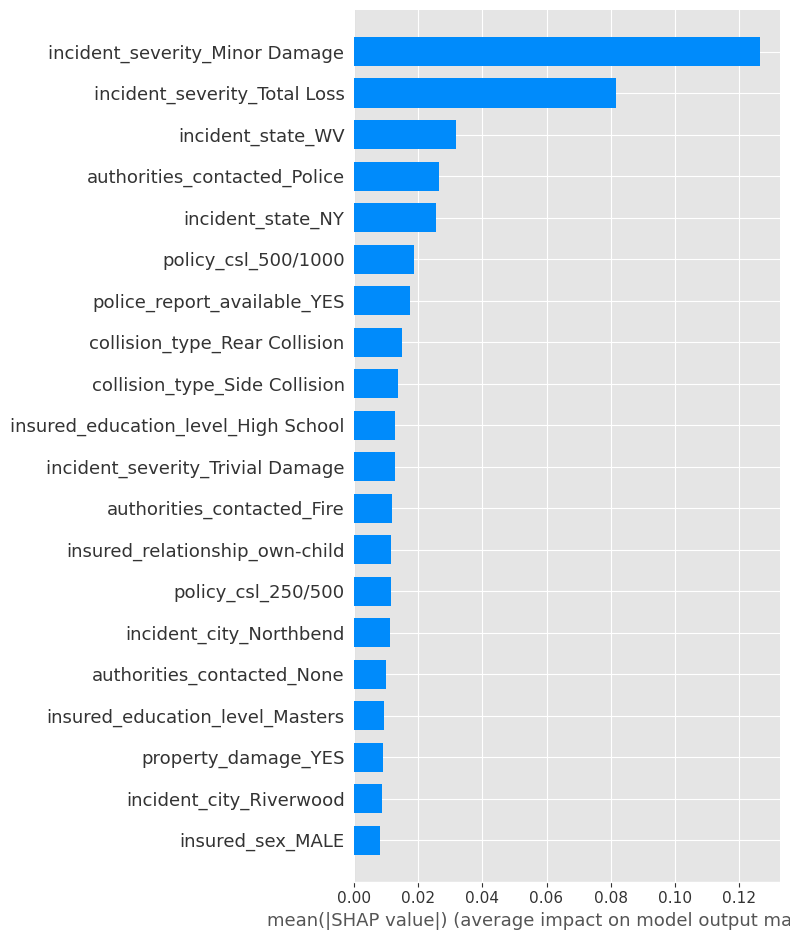

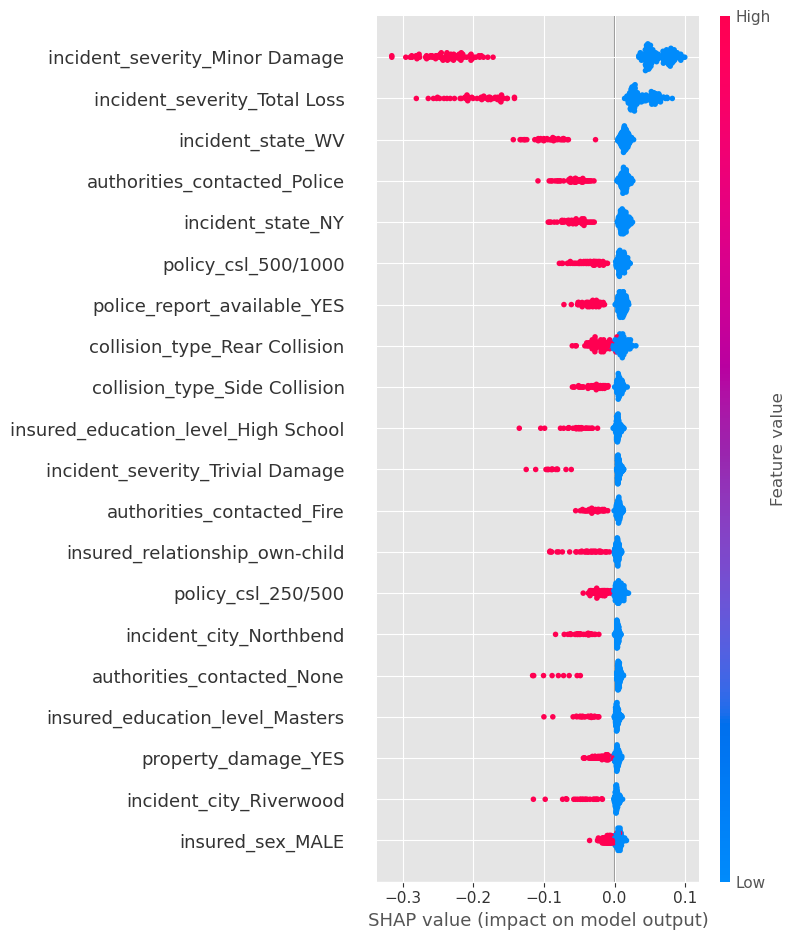

In [75]:
import shap

# Create a SHAP explainer object
explainer = shap.TreeExplainer(best_etc)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Summary plot for SHAP values
shap.summary_plot(shap_values[:,:,1], X_test, plot_type="bar", max_display=20)
shap.summary_plot(shap_values[:,:,1], X_test, max_display=20)


In [104]:
#7 Voting

In [92]:
from sklearn.ensemble import VotingClassifier

classifiers = [('KNN', knn), ('Random Forest', rand_clf),
               ('Ada Boost', ada), ('XGboost', xgb),
               ('Cat Boost', cat), ('Extra Trees Classifier', etc)]

vc = VotingClassifier(estimators = classifiers,voting ='soft')
vc.fit(X_train, y_train)

y_pred = vc.predict(X_test)

# accuracy_score, confusion_matrix and classification_report

vc_train_acc = accuracy_score(y_train, vc.predict(X_train))
vc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Voting Classifier is : {vc_train_acc}")
print(f"Test accuracy of Voting Classifier is : {vc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Voting Classifier is : 1.0
Test accuracy of Voting Classifier is : 0.765
[[146   5]
 [ 42   7]]
              precision    recall  f1-score   support

           0       0.78      0.97      0.86       151
           1       0.58      0.14      0.23        49

    accuracy                           0.77       200
   macro avg       0.68      0.55      0.55       200
weighted avg       0.73      0.77      0.71       200



In [99]:
from sklearn.ensemble import VotingClassifier

classifiers = [('KNN', knn), ('Random Forest', rand_clf),
               ('Ada Boost', ada), ('XGboost', xgb),
               ('Cat Boost', cat), ('Extra Trees Classifier', etc)]

vc = VotingClassifier(estimators = classifiers,voting ='soft')
vc.fit(X_train_smote, y_train_smote)

y_pred = vc.predict(X_test)

# accuracy_score, confusion_matrix and classification_report

vc_train_acc = accuracy_score(y_train_smote, vc.predict(X_train_smote))
vc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Voting Classifier is : {vc_train_acc}")
print(f"Test accuracy of Voting Classifier is : {vc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Voting Classifier is : 1.0
Test accuracy of Voting Classifier is : 0.78
[[140  11]
 [ 33  16]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.86       151
           1       0.59      0.33      0.42        49

    accuracy                           0.78       200
   macro avg       0.70      0.63      0.64       200
weighted avg       0.76      0.78      0.76       200



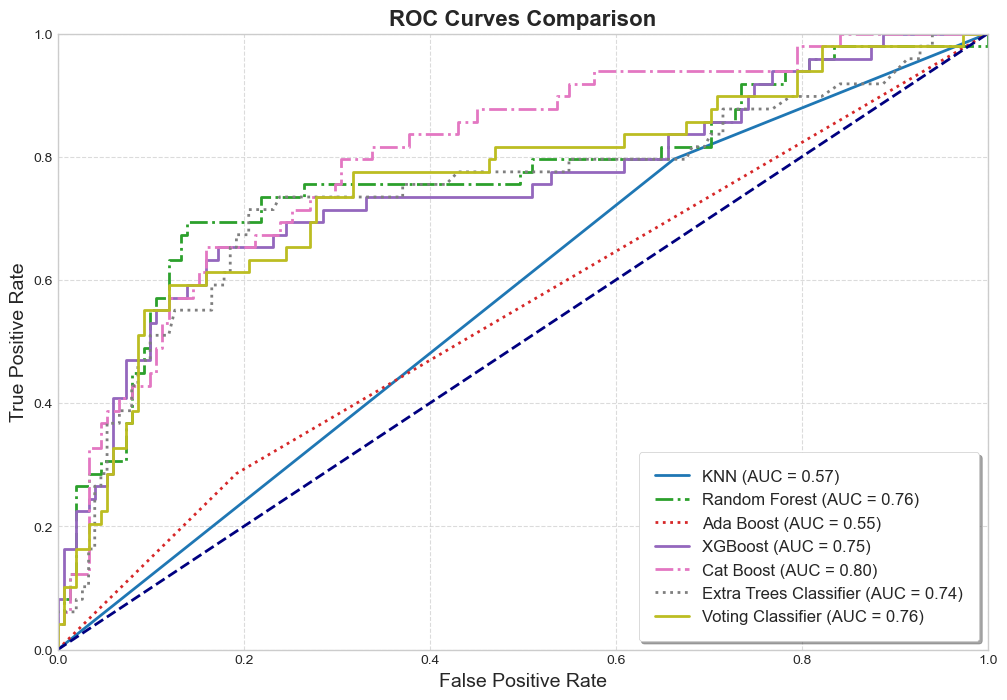

In [102]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Set a color palette and line styles
color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']
line_styles = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-']

# Initialize a plot with a stylish background
plt.figure(figsize=(12, 8))
plt.style.use('seaborn-whitegrid')  # Use a clean style

# List to store each model's ROC AUC score for the legend
roc_auc_scores = []

# Define the classifiers and their names with corresponding colors and line styles
classifiers = {
    'KNN': (best_knn, color_palette[0], line_styles[0]),
    'Random Forest': (best_rand_clf, color_palette[2], line_styles[2]),
    'Ada Boost': (best_ada, color_palette[3], line_styles[3]),
    'XGBoost': (best_xgb, color_palette[4], line_styles[4]),
    'Cat Boost': (best_cat, color_palette[6], line_styles[6]),
    'Extra Trees Classifier': (best_etc, color_palette[7], line_styles[7]),
    'Voting Classifier': (vc, color_palette[8], line_styles[8])
}

# Loop through classifiers to calculate ROC and plot
for name, (clf, color, linestyle) in classifiers.items():
    # Compute the predicted probabilities
    y_test_prob = clf.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test, y_test_prob)
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append((name, roc_auc))
    
    # Plot ROC curve with specified color and line style
    plt.plot(fpr, tpr, lw=2, color=color, linestyle=linestyle, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Customize plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves Comparison', fontsize=16, fontweight='bold')
plt.legend(loc="lower right", fontsize=12, frameon=True, shadow=True, borderpad=1)
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.show()


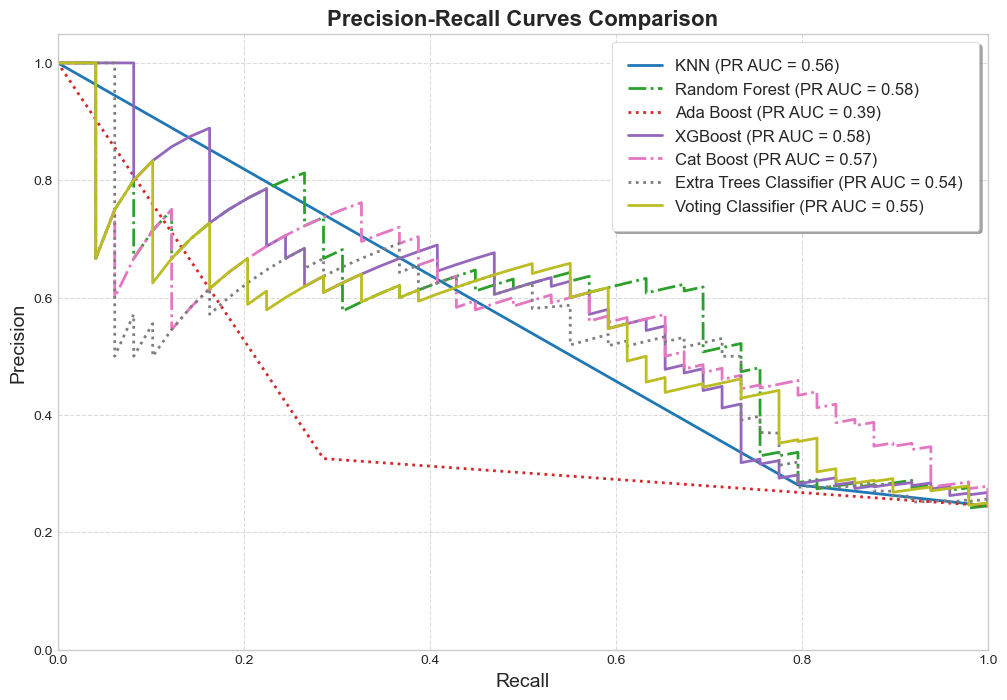

In [101]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Set a color palette and line styles
color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']
line_styles = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-']

# Initialize a plot with a stylish background
plt.figure(figsize=(12, 8))
plt.style.use('seaborn-whitegrid')  # Use a clean style

# Define the classifiers and their names with corresponding colors and line styles
classifiers = {
    'KNN': (best_knn, color_palette[0], line_styles[0]),
    'Random Forest': (best_rand_clf, color_palette[2], line_styles[2]),
    'Ada Boost': (best_ada, color_palette[3], line_styles[3]),
    'XGBoost': (best_xgb, color_palette[4], line_styles[4]),
    'Cat Boost': (best_cat, color_palette[6], line_styles[6]),
    'Extra Trees Classifier': (best_etc, color_palette[7], line_styles[7]),
    'Voting Classifier': (vc, color_palette[8], line_styles[8])
}

# Loop through classifiers to calculate Precision-Recall curve and plot
for name, (clf, color, linestyle) in classifiers.items():
    # Compute the predicted probabilities
    y_test_prob = clf.predict_proba(X_test)[:, 1]
    
    # Compute Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_test_prob)
    
    # Compute AUC for Precision-Recall curve
    pr_auc = auc(recall, precision)
    
    # Plot Precision-Recall curve with specified color and line style
    plt.plot(recall, precision, lw=2, color=color, linestyle=linestyle, label=f'{name} (PR AUC = {pr_auc:.2f})')

# Customize plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curves Comparison', fontsize=16, fontweight='bold')
plt.legend(loc="upper right", fontsize=12, frameon=True, shadow=True, borderpad=1)
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.show()


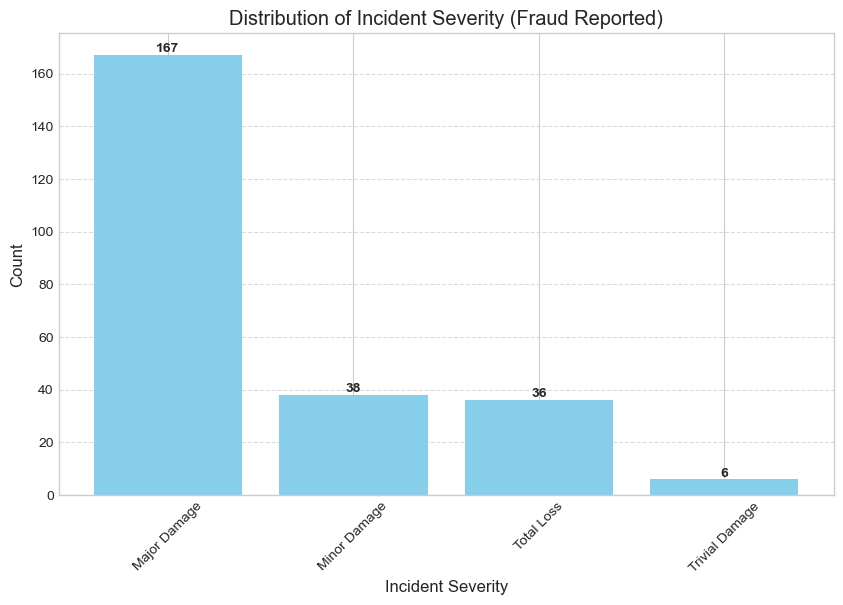

In [82]:
# Filter the data where fraud is reported and check the distribution of incident severity
fraud_incidents = df[df['fraud_reported'] == 1]['incident_severity']
incident_severity_distribution = fraud_incidents.value_counts()


# Modify the plot to include value labels above the bars
plt.figure(figsize=(10, 6))
bars = plt.bar(incident_severity_distribution.index, incident_severity_distribution.values, color='skyblue')

# Adding value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontweight='bold')

plt.title('Distribution of Incident Severity (Fraud Reported)')
plt.xlabel('Incident Severity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


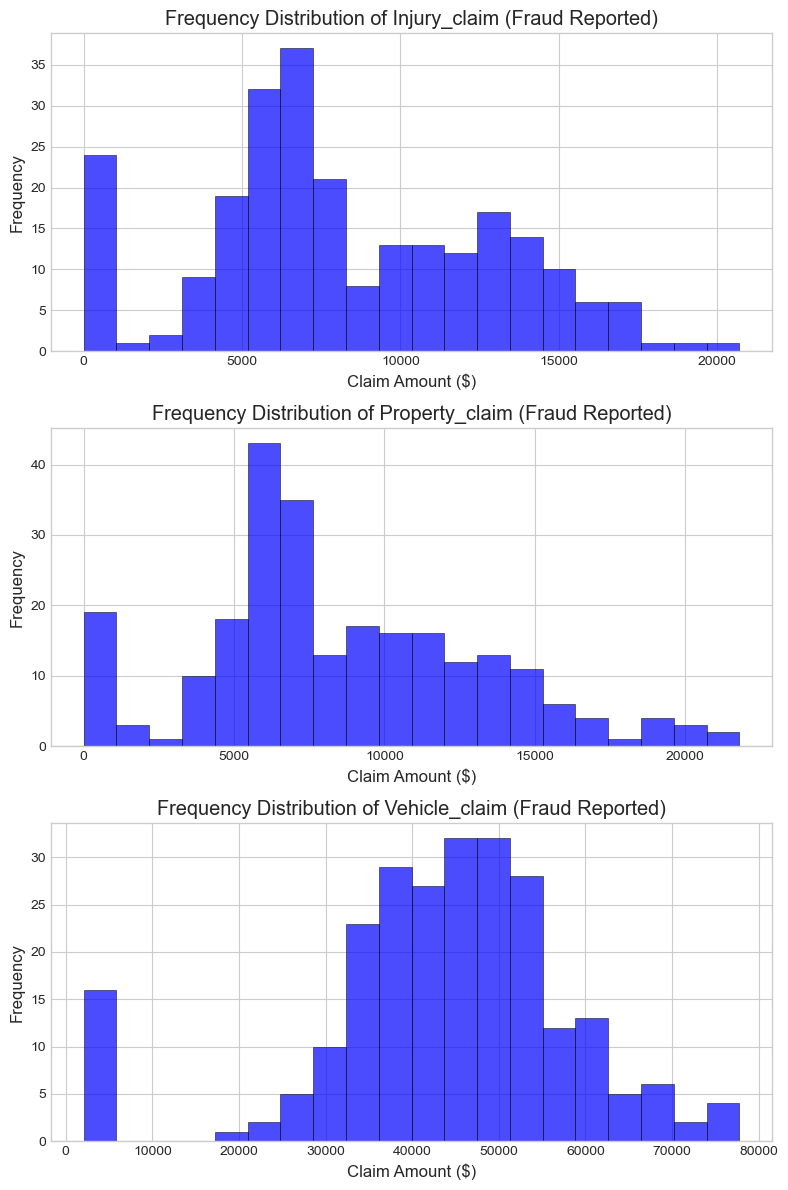

In [83]:
import matplotlib.pyplot as plt

# Filter the dataframe where fraud has been reported
fraud_claims = df[df['fraud_reported'] == 1]

# Set up the matplotlib figure for histograms
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# Plotting histograms
for i, claim_type in enumerate(['injury_claim', 'property_claim', 'vehicle_claim']):
    axes[i].hist(fraud_claims[claim_type], bins=20, alpha=0.7, color='blue', edgecolor='black')
    axes[i].set_title(f'Frequency Distribution of {claim_type.capitalize()} (Fraud Reported)')
    axes[i].set_xlabel('Claim Amount ($)')
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()
